In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [27]:
df = pd.read_csv('C:/Users/Timii/Documents/Dev/Zummit/AI-ML-Learning-Path/random_forest_housing/melb_data.csv')

In [28]:
df.head(7)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [30]:
df.dropna(axis=0, inplace=True)

In [31]:
df.Suburb.value_counts(ascending=True)

Whittlesea          1
Hampton Park        1
St Helena           1
Lower Plenty        1
Knoxfield           1
                 ... 
Coburg            102
Bentleigh East    106
Brunswick         124
Richmond          138
Reservoir         154
Name: Suburb, Length: 287, dtype: int64

In [32]:
df.Type.value_counts(ascending=True)

t     602
u    1506
h    4088
Name: Type, dtype: int64

In [33]:
df.SellerG.value_counts(ascending=True)

Leeburn               1
Buxton/Advantage      1
Owen                  1
Vic                   1
Parkes                1
                   ... 
Marshall            313
Barry               403
hockingstuart       535
Jellis              638
Nelson              763
Name: SellerG, Length: 203, dtype: int64

In [34]:
df.Method.value_counts()

S     3957
SP     898
PI     757
VB     543
SA      41
Name: Method, dtype: int64

In [35]:
y = df['Price']
FEATURES = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
CAT_COLS = ['Subhurb', 'Type', 'Method']
X = df[FEATURES]

In [36]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

forest_model = RandomForestRegressor()
forest_model.fit(scaler.fit_transform(train_X), train_y)
y_pred = forest_model.predict(scaler.transform(val_X))
print(mean_absolute_error(val_y, y_pred))

184155.18361216146


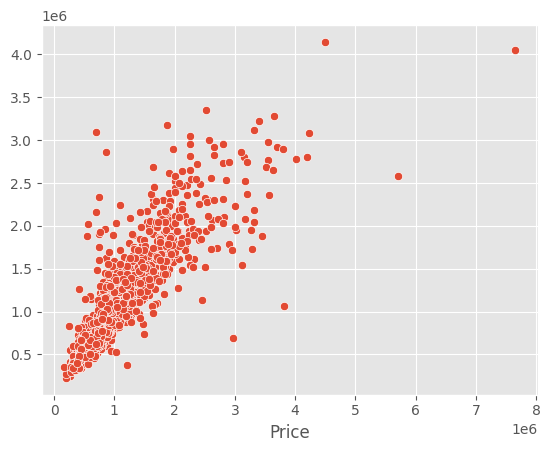

In [41]:
sns.scatterplot(x=val_y, y=y_pred);